<a href="https://colab.research.google.com/github/Saramendez12/Entrega_Proyectos/blob/main/Proj6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as stats
from scipy import stats
import seaborn as sns
import squarify as sq
from pingouin import multivariate_normality
from scipy.spatial.distance import cdist
from scipy.stats import chi2
from scipy.stats import multivariate_normal
from scipy.stats import normaltest
from sklearn.linear_model import LinearRegression

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos2do/datasets3.csv")

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


**Exploración Inicial y Limpieza de Datos**

Para  la exploración inicial obtenemos información acerca del dataset cargado. En este encontramos 3276 entradas y un total de 10 variables dentro de ella (columnas).  Así mismo vemos que de las 10 columnas de datos; 1 es de typo int, 9 de tipo float.Adicionalmente se observa que existen datos nulos en las variables "ph", "Sulfate" y "Trihalomethanes".

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


Para generar las estadisticas descriptivas del data frame usamos el metodo describe.

In [ ]:
data.describe()
#plt.savefig("describe1.png")

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


En primer lugar, estas estadisticas descriptivas son tomadas antes de la eliminación de valores nulos y de los outliers, observandose así que en las variables "ph", "Solids", "sulfate", "Conductivity", "Organic_carbon", "Turbidity" y "Photability" se presenta un sego negativo ya que la mediana es menor que la media, mientras que en "Hardnes","Chloramines" y "Trihalomethanes" la media es menor que la mediana, por lo que se presenta un sesgo positivo. 

Para iniciar la limpieza verificamos la existencia de datos duplicados, lo cual la salida demuestra que no existen datos duplicados.


In [ ]:
data.duplicated().sum()

0

Como observamos en la información del data existen datos nulos que es necesario corregir. Comprobamos así por el metodo isna la cantidad de estos datos y dentro de que variable se encuentra.

In [ ]:
data.isna().sum()
#plt.savefig("isna1.png")

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

 A través del método LinearRegresion corregimos la existencia de datos nulos  dentro de las variables identificadas ph, Sulfate y Trihalomethanes. 

In [ ]:
ph_not_null = data.drop(data[data.ph.isnull()].index)
ph_null = data.drop(ph_not_null.index)
features = ['Potability','Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon','Turbidity']
y = ph_not_null['ph']
x = ph_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = ph_null[features]
predicted_ph = model.predict(x)
data.loc[data.ph.isnull(),"ph"] = predicted_ph
data.ph.isna().sum()

0

In [ ]:
Sulfate_not_null = data.drop(data[data.Sulfate.isnull()].index)
Sulfate_null = data.drop(Sulfate_not_null.index)
features = ['Potability','Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon','Turbidity']
y = Sulfate_not_null['Sulfate']
x = Sulfate_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = Sulfate_null[features]
predicted_Sulfate = model.predict(x)
data.loc[data.Sulfate.isnull(), "Sulfate"] = predicted_Sulfate
data.Sulfate.isna().sum()

0

In [ ]:
Trihalomethanes_not_null= data.drop(data[data.Trihalomethanes.isnull()].index)
Trihalomethanes_null = data.drop(Trihalomethanes_not_null.index)
features = ['Potability','Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon','Turbidity']
y = Trihalomethanes_not_null['Trihalomethanes']
x = Trihalomethanes_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = Trihalomethanes_null[features]
predicted_Trihalomethanes = model.predict(x)
data.loc[data.Trihalomethanes.isnull(), "Trihalomethanes"] = predicted_Trihalomethanes
data.Trihalomethanes.isna().sum()

0

In [ ]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Ahora, se verifica la existencia de duplicados explicitos, observandose que no existen dentro de este dataset

In [ ]:
for i in data.columns:
  print(i)
  print(data[i].nunique())
  print(data[i].unique())

ph
3276
[7.1737179  3.71608008 8.09912419 ... 9.41951032 5.12676292 7.87467136]
Hardness
3276
[204.89045547 129.42292051 224.23625939 ... 175.7626463  230.60375751
 195.10229859]
Solids
3276
[20791.31898075 18630.05785797 19909.54173229 ... 33155.57821831
 11983.86937634 17404.17706105]
Chloramines
3276
[7.30021187 6.63524588 9.2758836  ... 7.35023323 6.30335653 7.50930586]
Sulfate
3276
[368.51644135 345.48892047 334.26819931 ... 325.74246495 334.516912
 339.55728938]
Conductivity
3276
[564.30865417 592.88535913 418.60621306 ... 432.04478305 402.88311312
 327.45976046]
Organic_carbon
3276
[10.37978308 15.18001312 16.86863693 ... 11.03906969 11.16894622
 16.14036763]
Trihalomethanes
3276
[86.99097046 56.32907628 66.42009251 ... 69.84540029 77.4882131
 78.69844633]
Turbidity
3276
[2.96313538 4.50065627 3.05593375 ... 3.2988755  4.70865847 2.30914906]
Potability
2
[0 1]


Outliers

Para determinar outliers multivariados se calcula la distancia de mahalanobis, evaluandose los resultados obtenidos en una prueba chi cuadrado, quedandonos con los datos que obtuvieron un p valor mayor a 0.05 , los indexamos dentro del dataframe y eliminamos los datos nulos (datos con un p valor menor a 0.05)

In [ ]:
data = data.astype({"Potability":"category"})

In [ ]:
def calculateMahalanobis(y=None, data=None, cov=None):
  
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()

In [ ]:
df = pd.DataFrame(data,columns=['ph', 'Hardness',
                                'Solids','Chloramines',
                                'Sulfate',"Conductivity","Organic_carbon","Trihalomethanes","Turbidity"])

In [ ]:
df['Mahalanobis'] = calculateMahalanobis(y=df, data=df[['ph', 'Hardness',
                                'Solids','Chloramines',
                                'Sulfate',"Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]])

In [ ]:
df['p'] = 1 - chi2.cdf(df['Mahalanobis'], 9)
df.head(10)
plt.savefig("maharanobis")

<Figure size 432x288 with 0 Axes>

In [ ]:
no_outliers= df[df["p"]>0.05]

In [ ]:
no_outliers

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Mahalanobis,p
0,7.173718,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,9.049807,0.432689
1,3.716080,129.422921,18630.057858,6.635246,345.488920,592.885359,15.180013,56.329076,4.500656,14.425361,0.107978
2,8.099124,224.236259,19909.541732,9.275884,334.268199,418.606213,16.868637,66.420093,3.055934,4.917806,0.841414
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,9.651222,0.379451
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,9.027353,0.434753
...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,14.136001,0.117569
3272,7.808856,193.553212,17329.802160,8.061362,340.653125,392.449580,19.903225,66.952003,2.798243,5.931287,0.746775
3273,9.419510,175.762646,33155.578218,7.350233,325.742465,432.044783,11.039070,69.845400,3.298875,7.063114,0.630548
3274,5.126763,230.603758,11983.869376,6.303357,334.516912,402.883113,11.168946,77.488213,4.708658,7.195663,0.616756


In [ ]:
data["ph"]=no_outliers["ph"]
data["Solids"]=no_outliers["Solids"]
data["Hardness"]=no_outliers["Hardness"]
data["Chloramines"]=no_outliers["Chloramines"]
data["Sulfate"]=no_outliers["Sulfate"]
data["Conductivity"]=no_outliers["Conductivity"]
data["Organic_carbon"]=no_outliers["Organic_carbon"]
data["Trihalomethanes"]=no_outliers["Trihalomethanes"]
data["Turbidity"]=no_outliers["Turbidity"]

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.173718,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,345.488920,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.268199,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,340.653125,392.449580,19.903225,66.952003,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,325.742465,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,334.516912,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               3009 non-null   float64 
 1   Hardness         3009 non-null   float64 
 2   Solids           3009 non-null   float64 
 3   Chloramines      3009 non-null   float64 
 4   Sulfate          3009 non-null   float64 
 5   Conductivity     3009 non-null   float64 
 6   Organic_carbon   3009 non-null   float64 
 7   Trihalomethanes  3009 non-null   float64 
 8   Turbidity        3009 non-null   float64 
 9   Potability       3276 non-null   category
dtypes: category(1), float64(9)
memory usage: 233.8 KB


In [ ]:
data.isna().sum()

ph                 267
Hardness           267
Solids             267
Chloramines        267
Sulfate            267
Conductivity       267
Organic_carbon     267
Trihalomethanes    267
Turbidity          267
Potability           0
dtype: int64

In [ ]:
data=data.dropna().reset_index(drop=True)

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.173718,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,345.488920,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.268199,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3004,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3005,7.808856,193.553212,17329.802160,8.061362,340.653125,392.449580,19.903225,66.952003,2.798243,1
3006,9.419510,175.762646,33155.578218,7.350233,325.742465,432.044783,11.039070,69.845400,3.298875,1
3007,5.126763,230.603758,11983.869376,6.303357,334.516912,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data.describe()
plt.savefig("describe2")

<Figure size 432x288 with 0 Axes>

**Categorizacion**

Para la  categorización, dividimos las variables en 4 intervalos.

In [ ]:
data["Conductivity_2"] = pd.cut(data["Conductivity"],4)
data["Chloramines_2"] = pd.cut(data["Chloramines"],4)
data["Hardness_2"] = pd.cut(data["Hardness"],4)
data["Solids_2"] = pd.cut(data["Solids"],4)
data["Organic_carbon_2"] = pd.cut(data["Organic_carbon"],4)
data["Turbidity_2"] = pd.cut(data["Turbidity"],4)
data["ph_2"] = pd.cut(data["ph"],4)
data["Sulfate_2"] = pd.cut(data["Sulfate"],4)
data["Trihalomethanes_2"] = pd.cut(data["Trihalomethanes"],4)

In [ ]:
data.pivot_table(index=["ph_2","Potability"])


Chloramines  Conductivity    Hardness  \
ph_2            Potability                                          
(1.976, 4.394]  0              7.251308    413.442402  184.908483   
                1              6.958035    441.646473  177.947266   
(4.394, 6.803]  0              7.354238    423.301649  190.113122   
                1              6.999818    421.372486  193.432122   
(6.803, 9.212]  0              6.973303    426.977484  200.706530   
                1              7.220019    425.250629  197.564011   
(9.212, 11.621] 0              6.544706    422.872291  203.123058   
                1              7.671330    432.147455  196.293860   

                            Organic_carbon        Solids     Sulfate  \
ph_2            Potability                                             
(1.976, 4.394]  0                13.699977  24631.258881  320.512265   
                1                14.218107  20494.383875  348.805720   
(4.394, 6.803]  0                14.254652  23129.548288  328.532383   
                1                14.140470  21119.095942  342.061097   
(6.803, 9.212]  0                14.361351  20827.255632  338.658429   
                1                14.277093  22255.641955  330.210423   
(9.212, 11.621] 0                15.013126  18372.217527  337.796482   
                1                14.195732  21263.298777  325.002059   

                            Trihalomethanes  Turbidity        ph  
ph_2            Potability                                        
(1.976, 4.394]  0                 64.851680   4.055486  3.854332  
                1                 64.572788   4.044298  3.956234  
(4.394, 6.803]  0                 66.322561   4.046127  5.941923  
                1                 66.681589   3.974173  5.997988  
(6.803, 9.212]  0                 66.382636   3.917132  7.637104  
                1                 66.818924   3.986816  7.580865  
(9.212, 11.621] 0                 66.395752   3.922834  9.928905  
                1                 69.238029   3.858506  9.829008

Nuestra primera relación entre las variables independientes y la variable objetivo a traves de tablas pivot , nos muestra la cantidad de todas la variables independientes (Chloramines	Conductivity	Hardness	Organic_carbon	Solids	Sulfate	Trihalomethanes	Turbidity	ph )  por Potabilidad del Agua y por categorización de la variable ph2 a traves de 4 intervalos. Observando así que la cantidad de cada variable varia de forma significativa en cuanto a si es Potable o No Potable.

In [ ]:
data.pivot_table(index=["Hardness_2","Potability"])
#plt.savefig("categori2")

Chloramines  Conductivity    Hardness  \
Hardness_2         Potability                                          
(102.973, 153.439] 0              7.245273    420.782935  139.429597   
                   1              7.541179    434.681113  137.572980   
(153.439, 203.705] 0              7.103095    426.457298  183.878851   
                   1              7.120769    424.470321  181.818097   
(203.705, 253.97]  0              7.015701    422.910646  221.111423   
                   1              7.140730    420.680166  221.368829   
(253.97, 304.236]  0              7.231889    431.568486  265.946480   
                   1              6.949438    444.526572  265.136924   

                               Organic_carbon        Solids     Sulfate  \
Hardness_2         Potability                                             
(102.973, 153.439] 0                14.196722  22739.997543  343.482312   
                   1                14.319173  20517.803870  345.813547   
(153.439, 203.705] 0                14.427712  21232.274251  338.155661   
                   1                14.159615  23225.573581  334.100504   
(203.705, 253.97]  0                14.327284  22078.274770  327.656710   
                   1                14.193608  20212.387847  332.620779   
(253.97, 304.236]  0                13.300067  19079.995460  328.564959   
                   1                15.399323  20281.735358  334.936628   

                               Trihalomethanes  Turbidity        ph  
Hardness_2         Potability                                        
(102.973, 153.439] 0                 67.680591   4.094994  6.586703  
                   1                 65.763160   4.037163  6.635821  
(153.439, 203.705] 0                 66.330050   3.976609  6.913374  
                   1                 67.256033   3.943193  7.051469  
(203.705, 253.97]  0                 65.962422   3.933703  7.328099  
                   1                 66.454089   4.017165  7.156295  
(253.97, 304.236]  0                 66.868498   3.903736  7.965750  
                   1                 67.701343   3.889262  7.007656

La relación de las variables independientes y la variable objetivo cuando esta la condición de Hardness2 se observa a traves de la tabla pivot, en ella vemos la probabilidad de la potabilidad del agua cuando se tiene categorización en Hardnees y poniendo a prueba con cada variable independiente.

In [ ]:
data.pivot_table(index=["Solids_2","Potability"])
#plt.savefig("categori3")

Chloramines  Conductivity    Hardness  \
Solids_2               Potability                                          
(677.748, 13479.518]   0              7.115863    427.609668  199.328466   
                       1              7.592085    416.318292  202.338459   
(13479.518, 26230.286] 0              7.087770    423.954569  195.898740   
                       1              7.168435    423.225355  195.697587   
(26230.286, 38981.053] 0              7.056560    426.961289  195.877983   
                       1              6.926522    429.374579  192.954497   
(38981.053, 51731.821] 0              7.065775    412.855232  201.514685   
                       1              6.843416    448.119597  185.823820   

                                   Organic_carbon        Solids     Sulfate  \
Solids_2               Potability                                             
(677.748, 13479.518]   0                14.438250  10659.866835  340.086287   
                       1                13.795850  10363.714243  351.080927   
(13479.518, 26230.286] 0                14.215283  19827.070051  334.305856   
                       1                14.333147  19460.077286  338.059858   
(26230.286, 38981.053] 0                14.537457  30585.602985  333.000390   
                       1                14.225278  31115.280349  320.816951   
(38981.053, 51731.821] 0                14.769410  41954.129264  318.288064   
                       1                14.115065  42415.705155  302.447134   

                                   Trihalomethanes  Turbidity        ph  
Solids_2               Potability                                        
(677.748, 13479.518]   0                 67.522164   3.894638  7.572966  
                       1                 66.579844   3.962771  6.958490  
(13479.518, 26230.286] 0                 66.138069   4.000556  7.067671  
                       1                 67.166770   3.974049  7.026210  
(26230.286, 38981.053] 0                 66.322013   3.935217  6.857734  
                       1                 66.055791   3.985414  7.143832  
(38981.053, 51731.821] 0                 62.961714   3.973124  6.160156  
                       1                 68.772473   4.046976  7.350691

Para nuestra tercera tabla pivot se analiza la relación entre las variables independientes, la potabilidad y la categorización de la variable Solids 2. Se puede ver que la relación entre No Potable y la independiente Solids es mayor para cada intervalo de Solids 2 frente a los intervalos con Potable. 

In [ ]:
data.pivot_table(index=["Chloramines_2","Potability"])
#plt.savefig("categori4")

Chloramines  Conductivity    Hardness  \
Chloramines_2   Potability                                          
(2.377, 4.86]   0              4.120090    431.713317  203.936715   
                1              4.110113    421.861060  192.822562   
(4.86, 7.333]   0              6.352982    424.846989  196.749046   
                1              6.285191    423.769293  198.016315   
(7.333, 9.806]  0              8.239513    423.031099  195.380101   
                1              8.258327    427.282021  193.494050   
(9.806, 12.279] 0             10.381672    437.341899  197.016525   
                1             10.408932    407.417527  194.999059   

                            Organic_carbon        Solids     Sulfate  \
Chloramines_2   Potability                                             
(2.377, 4.86]   0                14.165660  22198.396743  337.165032   
                1                14.200587  24645.552479  326.103218   
(4.86, 7.333]   0                14.409361  21493.393169  333.524896   
                1                14.191535  22107.458119  331.573087   
(7.333, 9.806]  0                14.317695  21770.301640  335.587644   
                1                14.313252  21321.135097  338.591960   
(9.806, 12.279] 0                13.921085  19758.396017  329.343720   
                1                13.686469  18282.573472  339.314069   

                            Trihalomethanes  Turbidity        ph  
Chloramines_2   Potability                                        
(2.377, 4.86]   0                 67.095153   3.836312  7.731785  
                1                 67.574861   3.884265  6.610105  
(4.86, 7.333]   0                 66.110050   3.958444  7.138979  
                1                 65.984579   4.025515  6.986054  
(7.333, 9.806]  0                 66.542789   4.006686  6.898592  
                1                 67.683111   3.923312  7.167997  
(9.806, 12.279] 0                 64.997791   3.848622  6.874643  
                1                 67.082265   4.112625  7.349083

En la tabla pivot generada a traves de la relación entre las independientes, la dependiente y la variable categorizada Choramines , se observa que en los intervalos (7.333, 9.806] y (9.806, 12.279] de Choramines 2, la potabilidad es en mayor probabilidad para esta. 

In [ ]:
data.pivot_table(index=["Sulfate_2","Potability"])
#plt.savefig("categori5")

Chloramines  Conductivity    Hardness  \
Sulfate_2          Potability                                          
(223.004, 281.29]  0              7.268391    413.157990  212.467439   
                   1              6.878070    434.083622  194.229362   
(281.29, 339.344]  0              7.021674    426.294425  200.318554   
                   1              7.105679    425.917263  197.464919   
(339.344, 397.397] 0              7.186536    421.866876  190.451224   
                   1              7.208901    424.238447  194.647985   
(397.397, 455.451] 0              6.807159    451.421292  176.902803   
                   1              7.762084    397.775471  186.019718   

                               Organic_carbon        Solids     Sulfate  \
Sulfate_2          Potability                                             
(223.004, 281.29]  0                13.808987  22568.662021  267.574674   
                   1                13.854418  25889.046140  263.445560   
(281.29, 339.344]  0                14.300539  22770.148307  320.762355   
                   1                14.211414  23373.698316  319.585991   
(339.344, 397.397] 0                14.422567  19683.091167  357.896080   
                   1                14.325822  18984.526689  361.427111   
(397.397, 455.451] 0                15.038364  20232.381437  411.419803   
                   1                14.211653  17538.102896  415.042321   

                               Trihalomethanes  Turbidity        ph  
Sulfate_2          Potability                                        
(223.004, 281.29]  0                 64.125148   3.978567  6.524194  
                   1                 70.648260   4.018696  7.406255  
(281.29, 339.344]  0                 66.269083   3.980660  6.964931  
                   1                 66.572296   3.989098  7.166553  
(339.344, 397.397] 0                 66.387094   3.936531  7.268729  
                   1                 66.603092   3.940318  6.902242  
(397.397, 455.451] 0                 69.025289   4.062833  7.503077  
                   1                 65.705938   4.037477  6.409056

Nuestra quinta tabla pivot nos permite ver la relación cuando tomamos nuestra independiente categorizada Sulfate con la dependiente Potability y con las demás variables. Vemos que la probabilidad de que el Agua sea No Potable y que tenga Sulfate es mayor que si fuera Potable para cada uno de los intervalos de Sulfate 2.

In [ ]:
data.pivot_table(index=["Conductivity_2","Potability"])
#plt.savefig("categori6")

Chloramines  Conductivity    Hardness  \
Conductivity_2     Potability                                          
(180.999, 302.785] 0              7.125126    281.718463  197.991653   
                   1              7.252345    281.998258  193.858354   
(302.785, 424.087] 0              7.119870    373.102118  197.082741   
                   1              7.116424    368.702534  196.433335   
(424.087, 545.389] 0              7.024115    474.998389  196.329069   
                   1              7.230486    477.519896  194.590211   
(545.389, 666.691] 0              7.169271    576.831158  194.440735   
                   1              6.934198    584.058996  198.388029   

                               Organic_carbon        Solids     Sulfate  \
Conductivity_2     Potability                                             
(180.999, 302.785] 0                14.101156  21253.653831  328.739217   
                   1                13.583705  21939.115417  341.204626   
(302.785, 424.087] 0                14.371733  21437.233076  335.436627   
                   1                14.138911  21095.632554  336.858021   
(424.087, 545.389] 0                14.368054  21954.721660  333.413832   
                   1                14.391201  22586.922152  330.495809   
(545.389, 666.691] 0                14.230229  20751.610284  337.943540   
                   1                14.286663  21273.849490  337.799598   

                               Trihalomethanes  Turbidity        ph  
Conductivity_2     Potability                                        
(180.999, 302.785] 0                 64.623204   4.030687  6.951782  
                   1                 64.356353   4.164520  7.047004  
(302.785, 424.087] 0                 67.044390   3.902598  7.088305  
                   1                 66.403740   3.970528  7.049610  
(424.087, 545.389] 0                 65.712207   4.019670  7.033451  
                   1                 67.908768   3.977375  7.038893  
(545.389, 666.691] 0                 66.226508   4.029981  7.260965  
                   1                 65.419393   3.878184  7.193823

La relación entre la independiente que muestra la conductividad del agua, contra las demás variables y la objetivo se ve que tiene mayor probabilidad cuando el agua es No Potable para los intervalos (302.785, 424.087] y (545.389, 666.691], en cambio en los intervalos (180.999, 302.785] y (424.087, 545.389] tiene mayor probabilidad cuando el agua es Potable, todo esto respecto a la variable caegorizada Conductivity 2.

In [ ]:
data.pivot_table(index=["Organic_carbon_2","Potability"])
#plt.savefig("categori7")

Chloramines  Conductivity    Hardness  \
Organic_carbon_2 Potability                                          
(4.352, 9.267]   0              7.280062    430.228564  194.355683   
                 1              6.858894    420.692073  197.444987   
(9.267, 14.162]  0              7.081734    421.459631  198.296106   
                 1              7.258187    419.511716  194.136858   
(14.162, 19.057] 0              7.046072    427.039549  195.511568   
                 1              7.084281    429.771174  196.859610   
(19.057, 23.952] 0              7.165529    427.215606  195.726402   
                 1              7.268340    425.816651  196.191111   

                             Organic_carbon        Solids     Sulfate  \
Organic_carbon_2 Potability                                             
(4.352, 9.267]   0                 8.001211  21225.734337  338.430271   
                 1                 7.936317  22485.855216  327.863494   
(9.267, 14.162]  0                12.209378  21395.363059  332.017678   
                 1                12.203759  21720.742275  336.002579   
(14.162, 19.057] 0                16.278951  21780.483168  335.316205   
                 1                16.185096  21647.604702  333.624728   
(19.057, 23.952] 0                20.473558  21884.652810  339.495982   
                 1                20.375673  22235.935082  337.204328   

                             Trihalomethanes  Turbidity        ph  
Organic_carbon_2 Potability                                        
(4.352, 9.267]   0                 68.432161   3.850869  7.060140  
                 1                 65.799692   4.015758  6.962191  
(9.267, 14.162]  0                 66.286690   4.015820  6.929706  
                 1                 66.911462   3.969870  7.029875  
(14.162, 19.057] 0                 66.087646   3.947283  7.219626  
                 1                 66.672851   3.991174  7.054519  
(19.057, 23.952] 0                 65.878412   3.904608  6.987611  
                 1                 68.478471   3.899311  7.314189

Nuestra Septima tabla pivot muestra la relacion entre las independientes, la objetivo y la independiente categorizada Organic Carbon2, se observa que las probabilidades de que el agua No Potable sean mayores que el agua Potable es cuando se relaciona con la Conductivity y Organic Carbon pero en determinados intervalos. Por esta tabla pivot vemos que en determinadas independientes se ve mayor probabilidad cuando es Potable y en otras cuando No.

In [ ]:
data.pivot_table(index=["Trihalomethanes_2","Potability"])
#plt.savefig("categori8")

Chloramines  Conductivity    Hardness  \
Trihalomethanes_2 Potability                                          
(14.239, 40.347]  0              6.862302    421.573553  201.785360   
                  1              7.207277    425.832861  195.335630   
(40.347, 66.35]   0              7.055177    427.134012  196.347398   
                  1              7.041470    423.167085  196.159986   
(66.35, 92.354]   0              7.151762    424.067672  196.842020   
                  1              7.228523    425.182923  194.863702   
(92.354, 118.357] 0              6.885126    412.287019  190.951512   
                  1              7.464473    428.317289  199.671106   

                              Organic_carbon        Solids     Sulfate  \
Trihalomethanes_2 Potability                                             
(14.239, 40.347]  0                14.503074  20609.376932  332.325191   
                  1                14.186545  22024.097157  339.134434   
(40.347, 66.35]   0                14.301289  22037.874993  334.330198   
                  1                14.220886  21857.492414  336.286171   
(66.35, 92.354]   0                14.381937  21348.833482  334.192626   
                  1                14.262429  21677.171683  332.246172   
(92.354, 118.357] 0                14.222266  20409.733636  340.849997   
                  1                13.890289  21675.921087  336.934035   

                              Trihalomethanes  Turbidity        ph  
Trihalomethanes_2 Potability                                        
(14.239, 40.347]  0                 33.706254   4.034781  7.213401  
                  1                 33.643196   4.060370  6.997680  
(40.347, 66.35]   0                 56.712078   3.996353  7.050541  
                  1                 56.759768   4.036406  7.049529  
(66.35, 92.354]   0                 76.346325   3.922804  7.069023  
                  1                 76.096006   3.919144  7.050056  
(92.354, 118.357] 0                 99.535452   4.074477  7.155451  
                  1                 99.262927   3.938805  7.222138

Para esta penultima tabla pivot podemos ver la relación entre la variable categorizada Trihalomethnes 2, la objetivo Potability y las independientes. Mostrando asi que dentro de Trihalomethanes para los intervalos (14.239, 40.347],(66.35, 92.354] y (92.354, 118.357] es más probable que se tenga mayor cantidad de la independiente en No Potable. 

In [ ]:
data.pivot_table(index=["Turbidity_2","Potability"])
#plt.savefig("categori9")

Chloramines  Conductivity    Hardness  \
Turbidity_2    Potability                                          
(1.445, 2.685] 0              7.028121    414.557236  198.827541   
               1              7.227885    427.376477  197.452479   
(2.685, 3.92]  0              7.062944    423.212698  197.852377   
               1              7.192839    425.780683  194.861994   
(3.92, 5.154]  0              7.100990    427.085304  195.953115   
               1              7.140917    425.386859  196.223182   
(5.154, 6.389] 0              7.155598    428.153354  191.078808   
               1              6.977808    405.280390  195.917343   

                           Organic_carbon        Solids     Sulfate  \
Turbidity_2    Potability                                             
(1.445, 2.685] 0                14.122068  22159.325800  334.482238   
               1                14.621920  19733.193892  338.905923   
(2.685, 3.92]  0                14.308992  21483.089556  335.442769   
               1                14.213464  21996.710355  333.239351   
(3.92, 5.154]  0                14.493227  21709.416129  333.032143   
               1                14.250781  21904.569779  335.047897   
(5.154, 6.389] 0                13.616077  21034.962387  337.570798   
               1                13.769011  20567.773085  336.742693   

                           Trihalomethanes  Turbidity        ph  
Turbidity_2    Potability                                        
(1.445, 2.685] 0                 65.672498   2.385972  7.086323  
               1                 70.217549   2.375410  7.281655  
(2.685, 3.92]  0                 66.441951   3.433811  7.176187  
               1                 67.112052   3.442426  7.046204  
(3.92, 5.154]  0                 66.305290   4.441873  6.961849  
               1                 66.399508   4.441199  7.069165  
(5.154, 6.389] 0                 65.712145   5.443417  7.123073  
               1                 65.796632   5.482924  6.839182

Para nuestra ultima tabla pivot mostrando la relación entre las independientes y la objetivo encontramos que Turbidity 2 es la categorización de si el agua es turbia o no para los intervalos categorizados, a travez de esto podemos concluir que las probabilidades de relación con la variable turbity cuando el agua es potable o no potable osilan entre 2.37 y 5.48. 

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Conductivity_2,Chloramines_2,Hardness_2,Solids_2,Organic_carbon_2,Turbidity_2,ph_2,Sulfate_2,Trihalomethanes_2
0,7.173718,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,"(545.389, 666.691]","(4.86, 7.333]","(203.705, 253.97]","(13479.518, 26230.286]","(9.267, 14.162]","(2.685, 3.92]","(6.803, 9.212]","(339.344, 397.397]","(66.35, 92.354]"
1,3.716080,129.422921,18630.057858,6.635246,345.488920,592.885359,15.180013,56.329076,4.500656,0,"(545.389, 666.691]","(4.86, 7.333]","(102.973, 153.439]","(13479.518, 26230.286]","(14.162, 19.057]","(3.92, 5.154]","(1.976, 4.394]","(339.344, 397.397]","(40.347, 66.35]"
2,8.099124,224.236259,19909.541732,9.275884,334.268199,418.606213,16.868637,66.420093,3.055934,0,"(302.785, 424.087]","(7.333, 9.806]","(203.705, 253.97]","(13479.518, 26230.286]","(14.162, 19.057]","(2.685, 3.92]","(6.803, 9.212]","(281.29, 339.344]","(66.35, 92.354]"
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,"(302.785, 424.087]","(7.333, 9.806]","(203.705, 253.97]","(13479.518, 26230.286]","(14.162, 19.057]","(3.92, 5.154]","(6.803, 9.212]","(339.344, 397.397]","(92.354, 118.357]"
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,"(302.785, 424.087]","(4.86, 7.333]","(153.439, 203.705]","(13479.518, 26230.286]","(9.267, 14.162]","(3.92, 5.154]","(6.803, 9.212]","(281.29, 339.344]","(14.239, 40.347]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,"(424.087, 545.389]","(4.86, 7.333]","(153.439, 203.705]","(38981.053, 51731.821]","(9.267, 14.162]","(3.92, 5.154]","(4.394, 6.803]","(339.344, 397.397]","(66.35, 92.354]"
3005,7.808856,193.553212,17329.802160,8.061362,340.653125,392.449580,19.903225,66.952003,2.798243,1,"(302.785, 424.087]","(7.333, 9.806]","(153.439, 203.705]","(13479.518, 26230.286]","(19.057, 23.952]","(2.685, 3.92]","(6.803, 9.212]","(339.344, 397.397]","(66.35, 92.354]"
3006,9.419510,175.762646,33155.578218,7.350233,325.742465,432.044783,11.039070,69.845400,3.298875,1,"(424.087, 545.389]","(7.333, 9.806]","(153.439, 203.705]","(26230.286, 38981.053]","(9.267, 14.162]","(2.685, 3.92]","(9.212, 11.621]","(281.29, 339.344]","(66.35, 92.354]"
3007,5.126763,230.603758,11983.869376,6.303357,334.516912,402.883113,11.168946,77.488213,4.708658,1,"(302.785, 424.087]","(4.86, 7.333]","(203.705, 253.97]","(677.748, 13479.518]","(9.267, 14.162]","(3.92, 5.154]","(4.394, 6.803]","(281.29, 339.344]","(66.35, 92.354]"


**Visualizacion**

Para la visulaización de la distribución de los datos realizamos graficos de barras divididos en potable y o potable para cada variable 

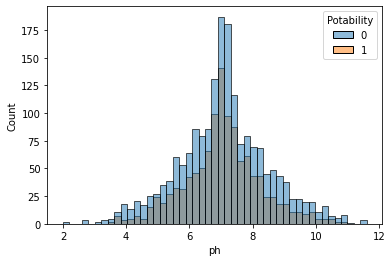

In [ ]:
sns.histplot(x=data['ph'], hue=data['Potability']) 
plt.savefig("visu1")

Para el caso de la variable ph, encontramos que independientemente del valor,  existen más muestras no potables que potables, encontrandose la mayor cantidad de datos en el intervalo entre ph 6 y ph 8 tanto para potables como para no potables 

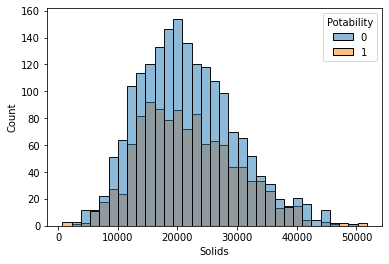

In [ ]:
sns.histplot(x=data['Solids'], hue=data['Potability'])
plt.savefig("visu2")

Para el caso de la variable "solids", la proporción de muestras no potables es mayor en casí todos los intervalos, sin embargo en los intervalos más altos las muestras potables son mayores que las no potables . Por otra parte la mayor cantidad de datos se agrupa entre los valores de 10000 y 30000

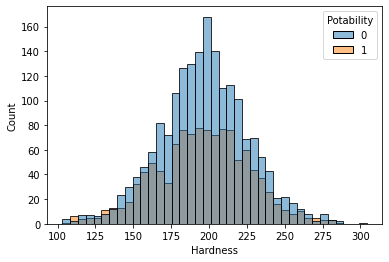

In [ ]:
sns.histplot(x=data['Hardness'], hue=data['Potability'])
plt.savefig("visu3")

Con la variable "Hardness" sucede algo similar a lo visto con la variable "solids", las muestras no potables son mayores a las potables en casi todos los intervalos, sin embargo en los intervalos más bajos y en los más altos en algunos puntos hay más muestra potables quen no potables. Por otra parte la mayor cantidad de datos se agrupa entre 175 y 225

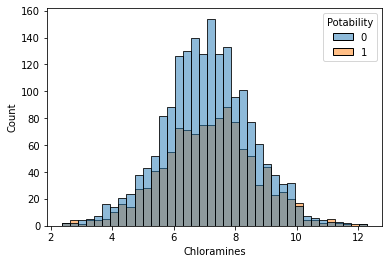

In [ ]:
sns.histplot(x=data['Chloramines'], hue=data['Potability'])
plt.savefig("visu4")

Al igual que con la variable anteriror, en "Chloramines" las muestras no potables son mayores a las potables en casi todos los intervalos, a excepción de algunos puntos en  los intervalos más bajos y en los más altos donde hay más muestra potables que no potables. Adicionalmente entre 6 y 8 se agrupa la mayor cantidad de datos

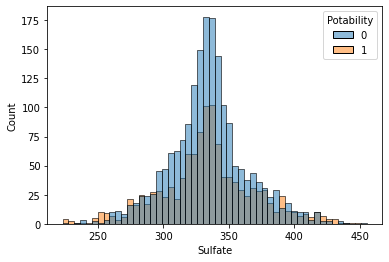

In [ ]:
sns.histplot(x=data['Sulfate'], hue=data['Potability'])
plt.savefig("visu5")

Al igual que con la variable anteriror, en "sulfate" las muestras no potables son mayores a las potables en casi todos los intervalos, a excepción de algunos puntos en los intervalos más bajos y en los más altos donde hay más muestra potables que no potables, sin embargo estos puntos son mucho más marcados en comparación con las variables anteriores.Por otra parte, aproximadamente entre 325 y 375 se sagrupa la mayor cantidad de datos.

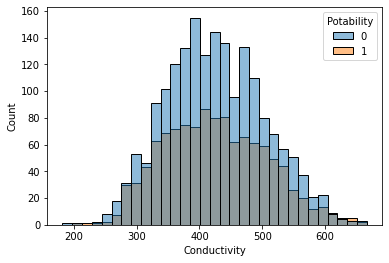

In [ ]:
sns.histplot(x=data['Conductivity'], hue=data['Potability'])
plt.savefig("visu6")

"Conductivity"sigue la misma tendencia de las variables anteriores de predominio de las muestras no potables en practicamente todos los intervalos a excepciond de pequeños puntos en los intervalos más bajos y más altos , sin embargo, para este caso, los puntos donde resaltan las muestras potables son más pequeños. Por otra parte, aporximadamente entre 325 y 500 se agrupa la mayor cantidad de datos


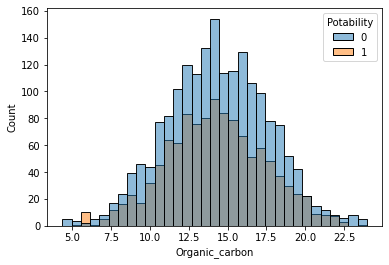

In [ ]:
sns.histplot(x=data['Organic_carbon'], hue=data['Potability'])
plt.savefig("visu7")

Para el caso de "Organic_Carbon , a excepción de un punto bastante marcado entre 5 y 7.5 donde las muestras potables son mayores a las potables, las muestras no potables son mayores que las potables.Adicoonalmente, entre el 12 y 17.5 aproximandemante se encuentra la mayor cantidad de datos 

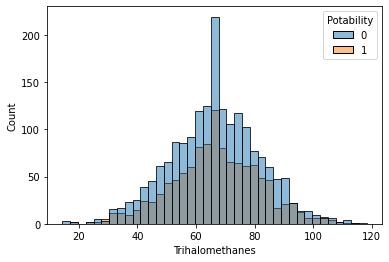

In [ ]:
sns.histplot(x=data['Trihalomethanes'], hue=data['Potability'])
plt.savefig("visu8")

Dentro de la variable "Trihalomethanes", resalta un punto entre 60 y 80 en el que el conteo de datos es mayor en comparación con los demas puntos. Adiconalmente dentro de esta variable sigue predominando las muestras no potables.

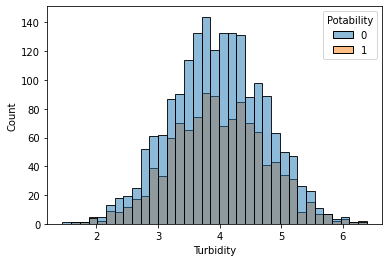

In [ ]:
sns.histplot(x=data['Turbidity'], hue=data['Potability'])
plt.savefig("visu9")

Por ultimo en "Turbidity" , las muestras no potables resaltan más que las potables en todos los intervalos. Adiconalmente en 3.5 y 4 se agrupa la mayor cantidad de datos.

Con respecto a las proporciones de la variable objetivo, encontramos que existen más muestras no potables que potables.

In [ ]:
pot = data['Potability'].value_counts()
pot.index = ['NonPotable', 'Potable']

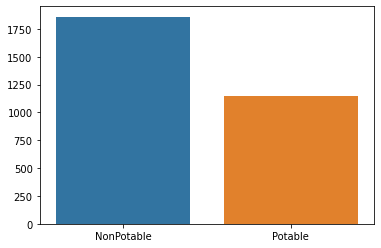

In [ ]:
sns.barplot(x=pot.index, y=pot.values)
plt.savefig("propo1")

Para la relación entre variables se realizo un heatmmap y un correlograma dentro de los que se observó es practicamente nula la correlación que existe entre las variables. (Colores muy oscuros en el heatmap y se observan puntos sin relación en el correlograma)

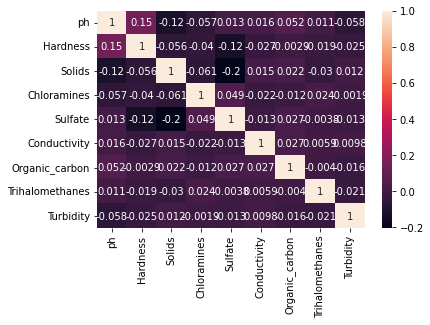

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.savefig("rela1")

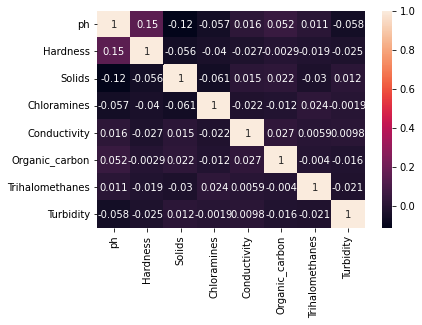

In [ ]:
df = data[['ph','Hardness','Solids','Chloramines','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
sns.heatmap(df.corr(), annot=True)

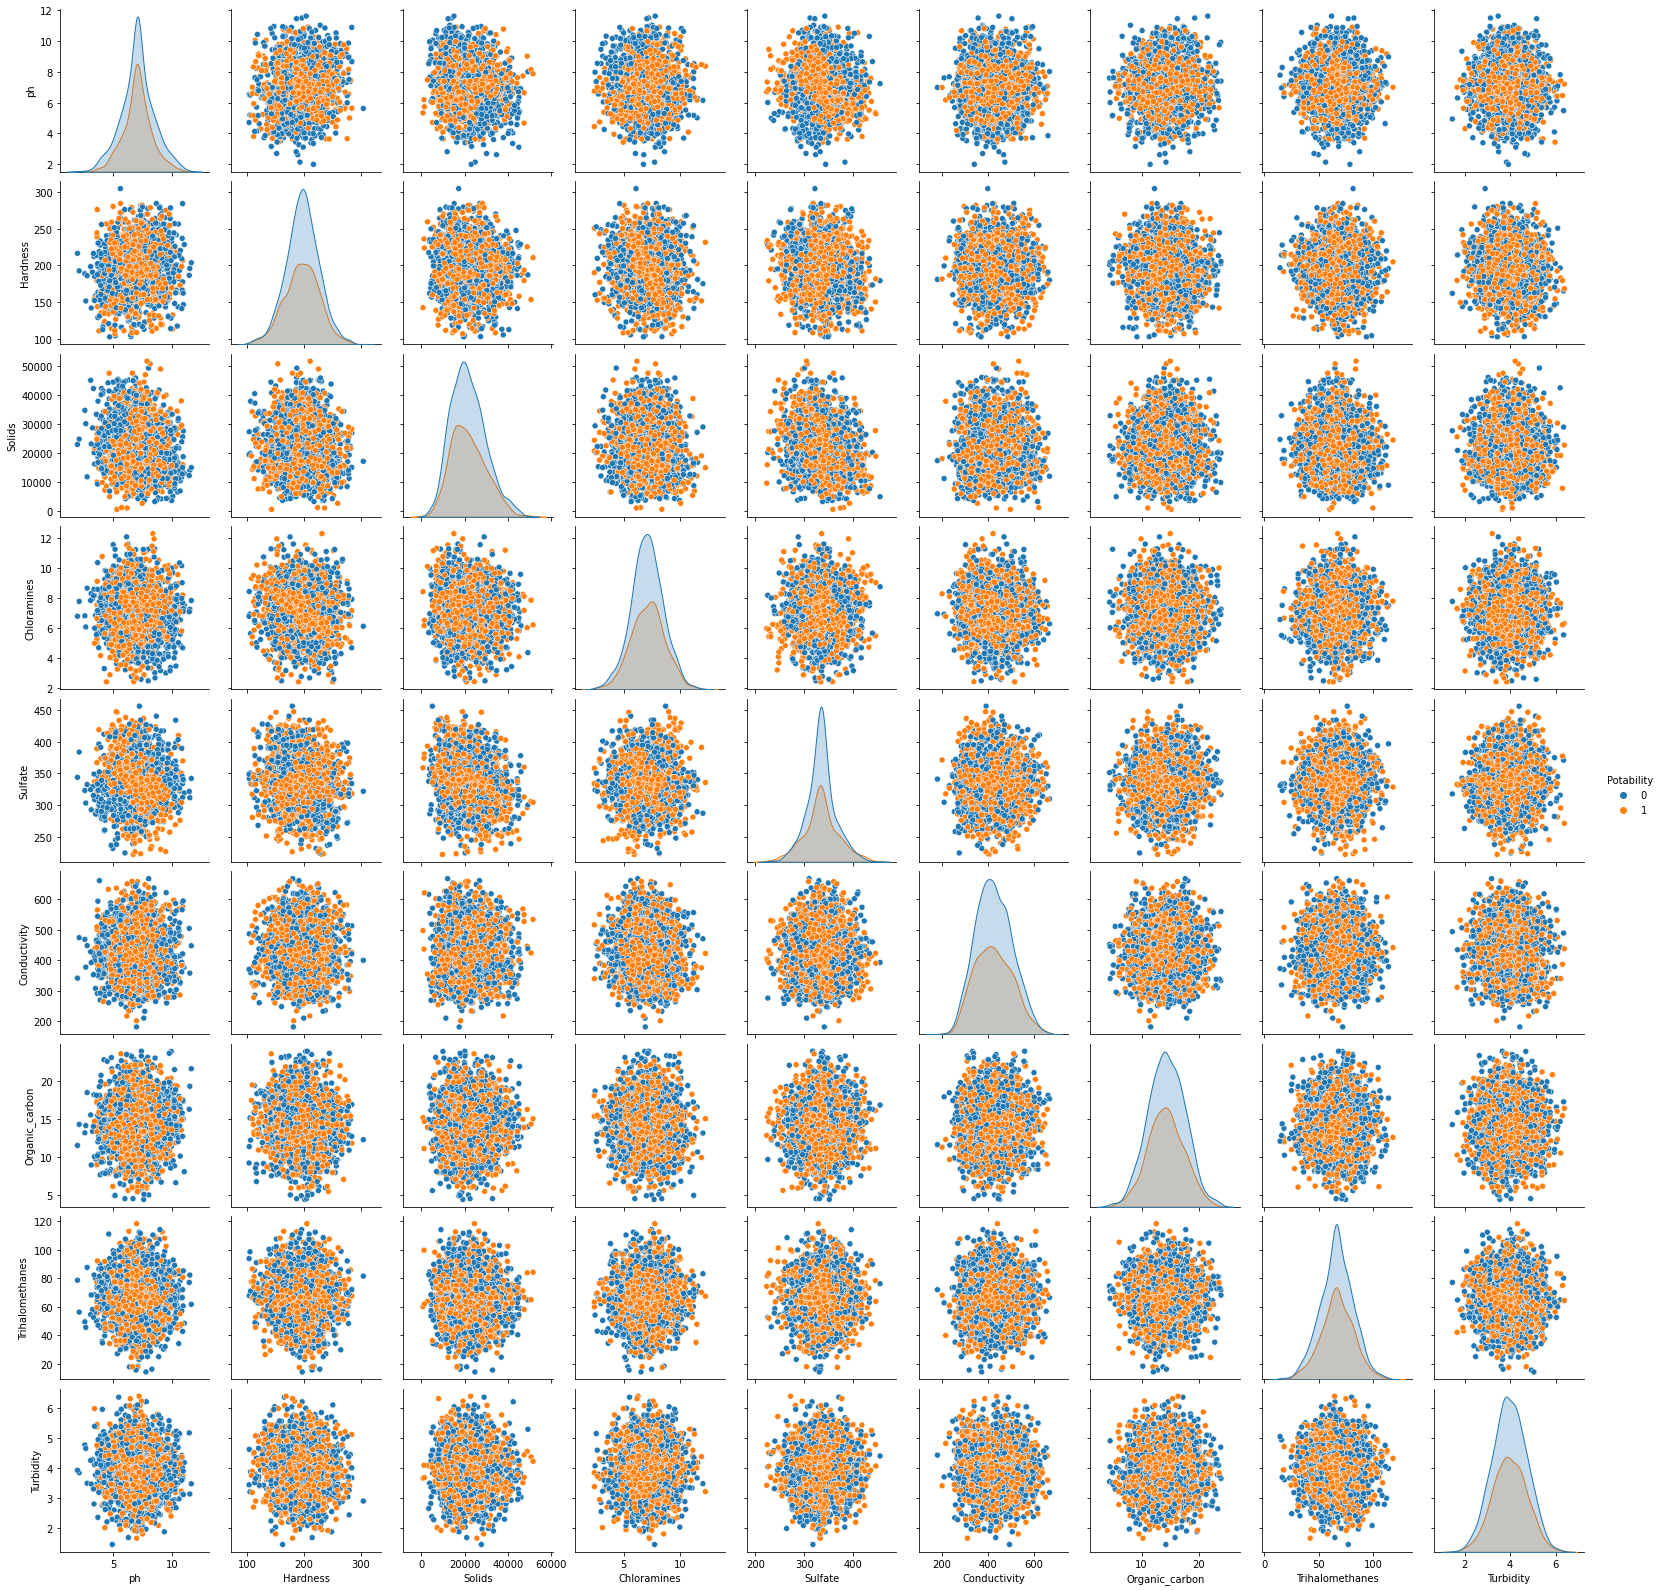

In [ ]:
data['Potability'] = data['Potability']
sns.pairplot(data, hue="Potability")
plt.savefig("pair1")

Para mostrar la relación entre dos distribucciones realizamos boxplots, todos respecto a la variable objeto.

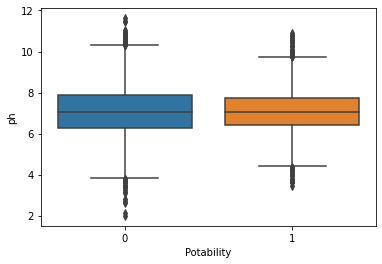

In [ ]:
sns.boxplot(data=data, y="ph", x="Potability")
plt.savefig("box1")

Las dimensiones de la primera caja estan determinadas por el primer y tercer cuartil, para el caso de No Potable (0) Q1 es aproximadamente 6,2 y Q3 es aproximadamente 8, es decir que en nuestro boxplot vemos que el 50 % de ph en No potable esta entre estos dos cuartiles. Para el caso de analizar Potable el 50 % del ph se encuentra entre 6,8 ay 7,7 aproximadamente.Por ultmo a traves del grafico vemos que la mediana se situa en el centro mostrando una simetria y por debajo de la caja se ve la existencia de outliders pero que no afectan nuestro modelo debido a que los que afectan fueron limpiados.

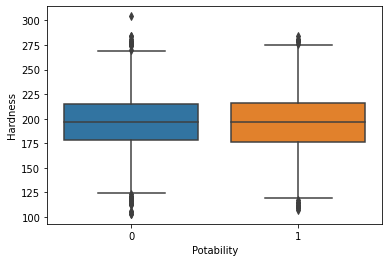

In [ ]:
sns.boxplot(data=data, y="Hardness", x="Potability")
plt.savefig("box2")

Las dimensiones para la caja que muestra la distribucción entre Hardness y Potability son para No Potable; Q1 = 175 y Q3=222,5 aproximadamente. Para Potable son de la mismas cantidades aproximadamente. Motivo por el cual se afirma una distribucción 50/50 con la variable objetivo con asimetria. Así mismo se ve la existencia de muy pocos outliders. 

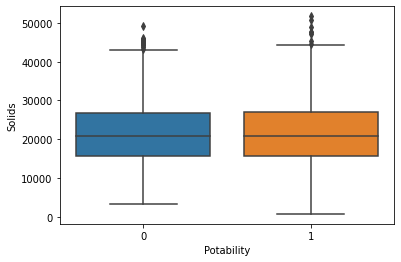

In [ ]:
sns.boxplot(data=data, y="Solids", x="Potability")
plt.savefig("box3")

Para ver la distribucción entre Solids y Potability la caja muestra que tanto para Potable y No Potable en relación con Solids se presenta una asimetria en la distribucción. Y pocos Outliders en las dos variables en la parte superior.

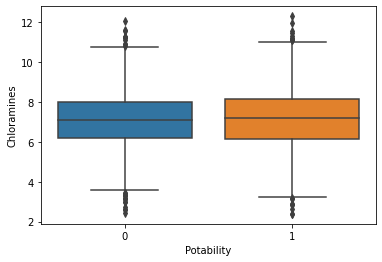

In [ ]:
sns.boxplot(data=data, y="Chloramines", x="Potability")
plt.savefig("box4")

Para la caja de Chloramines y Potability vemos que la distribucción de Potable es de mayor proporción presentando así un Q3 mayor de 8 por lo tanto mayor al Q3 de No Potable. Vemos que para No Potable se encuentran mayores outliders bajo el nivel de 3,8 y para Potable los outliders se encuentran encima del final de la caja quiere decir sobre el nivel de 11 aproximadamente.

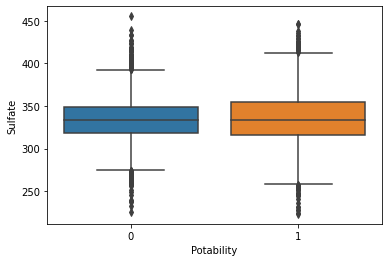

In [ ]:
sns.boxplot(data=data, y="Sulfate", x="Potability")
plt.savefig("box5")

Para la caja de las variables Sulfate y Potability, observamos que para No potable la distribucción del primer y tercer cuantil es muy pequeña esta entre 325 y 350 aproximadamente  en cambio para Potable los cuartiles se encuentran desde 318 y mas de 350 aproximadamente. Para las dos distribucciones se presenta simetria pero para el caso de No potable los outliders permanecen muy concentrados a los extremos.

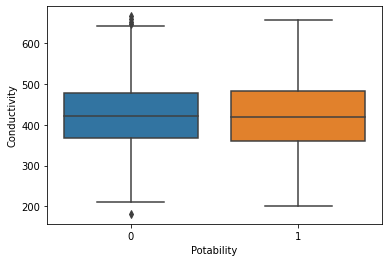

In [ ]:
sns.boxplot(data=data, y="Conductivity", x="Potability")
plt.savefig("box6")

La caja que muestra la distribuccion entre Conductivity y Potability, preseta a simple vista solo un poco de diferencia de dimensiones entre Potable y no Potable. Así mismo se aprecia que cada caja es simetrica y en el caso de No potable - Conductivity se observan pocos outliders por encima del tamaño de la caja. 

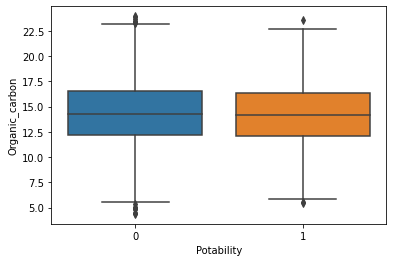

In [ ]:
sns.boxplot(data=data, y="Organic_carbon", x="Potability")
plt.savefig("box7")

En estos ultimos boxplots de distribucciones podemos apreciar que estas son simetricas y tienden a tener un parecido en sus dimensiones mostrando así una distribucción 50/50.Así mismo se mantiene la observación de los outliders en ambas graficas pero en mayor cantidad en No Potable.

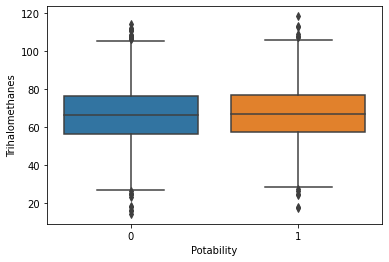

In [ ]:
sns.boxplot(data=data, y="Trihalomethanes", x="Potability")
plt.savefig("box8")

La penultima box plot nos muestra una simetria casi identica pero la variación de las dimensiones entre Thrihalomethnes-Potable y Truhalomethanes - No potable es de niveles minimos, las mayores diferencias es la cantidad de outliders presentes por encima y encima del tamaño de la caja.

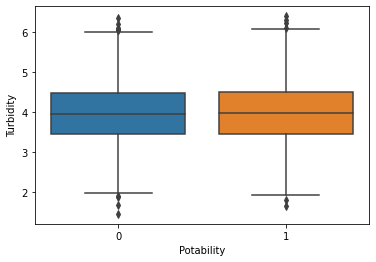

In [ ]:
sns.boxplot(data=data, y="Turbidity", x="Potability")
plt.savefig("box9")

El ultimo boxplot nos muestra una simetria casi perfecta entre la distribucción de las variables y una poca cantidad de outliders para las distribucciones. Estas cajas nos pemitieron ver de forma grafica como era el comportamiento de las distribucciones al ponerlas a partir de la objetivo.

**Pruebas de Hipotesis**

Se realiza un datasat sin la variable objetivo para realizar la pruab de distribucción normal multivariada.

In [ ]:
data2=pd.DataFrame(data,columns=['ph', 'Hardness','Solids','Chloramines','Sulfate',"Conductivity","Organic_carbon","Trihalomethanes","Turbidity"])
data2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.173718,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,345.488920,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,334.268199,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3004,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3005,7.808856,193.553212,17329.802160,8.061362,340.653125,392.449580,19.903225,66.952003,2.798243
3006,9.419510,175.762646,33155.578218,7.350233,325.742465,432.044783,11.039070,69.845400,3.298875
3007,5.126763,230.603758,11983.869376,6.303357,334.516912,402.883113,11.168946,77.488213,4.708658


Prueba de Hipotesis de normalidad multivariada


*   Ho: El dataset sigue una distribucción normal multivarada
*   Ha: El dataset NO sigue una distribucción normal multivariada.

α=0.05



In [ ]:
multivariate_normality(data2, alpha = .05 ) #prueba del dataset    ----- el p valor es menor a 0.05 por lo tanto se asume que el dataset sin la variable objetivo no sigue una distribucion normal multivariada


HZResults(hz=1.1369243176166905, pval=4.509462445228134e-66, normal=False)

Para la prueba de distribución normal multivariada del dataset sin la variable objetivo, se tiene como resultado un pvalor inferior a 0.05, por lo tanto se asume que el dataset sin la variable objetivo no sigue una distribución normal

Para la prueba de distribucción normal, se importa el modulo stats de la libreria scipy y se realiza un normaltest para cada una de las variables, en la cual ya esta incorporada la prueba hipotesis.

In [ ]:
from scipy import stats

In [ ]:
columnas_numericas = data2.select_dtypes(['int', 'float']).columns
for num_col in columnas_numericas:
    _, pval = stats.normaltest(data2[num_col])
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))
    else:
        print("Columna {} si sigue una distribución normal".format(num_col))

Columna ph no sigue una distribución normal
Columna Hardness no sigue una distribución normal
Columna Solids no sigue una distribución normal
Columna Chloramines si sigue una distribución normal
Columna Sulfate no sigue una distribución normal
Columna Conductivity no sigue una distribución normal
Columna Organic_carbon si sigue una distribución normal
Columna Trihalomethanes si sigue una distribución normal
Columna Turbidity si sigue una distribución normal


Se concluye que las variables ph, solids,sulfate,conductivity, turbidity NO siguen una distribucción normal. Mientras que hardness, chloramines,organic carbon, trihalomethanes SI siguen una distribución normal.

Se efectua la división del data set para la realización de las diferencias de medias y medianas.

In [ ]:
data.replace({"Potability":{0:"NonPotable",1:"Potable"}}, inplace=True)

In [ ]:
data_nonpotable=data.loc[data["Potability"]=="NonPotable"]

In [ ]:
data_potable=data.loc[data["Potability"]=="Potable"]

In [ ]:
data_nonpotable.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000
mean,7.070730,196.630037,21590.797368,7.084258,334.417172,424.896057,14.345107,66.302907,3.967144
std,1.410621,28.768400,8005.744507,1.427465,29.475626,77.855187,3.240457,15.165459,0.755832
min,1.985383,103.173587,3413.081633,2.456014,225.516628,181.483754,4.371899,14.343161,1.450000
25%,6.256276,178.760087,15791.982123,6.185621,318.776393,368.585608,12.167663,56.524092,3.457646
50%,7.063270,197.039446,20717.105061,7.082597,334.051924,420.768977,14.293508,66.313602,3.951968
75%,7.880188,214.758280,26738.122057,8.008212,348.494905,478.768499,16.593393,76.321642,4.479748
max,11.621140,304.235912,49341.421279,12.062536,455.451234,666.690618,23.952450,114.208671,6.357439


In [ ]:
data_potable.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000
mean,7.055454,195.671396,21771.258303,7.157867,334.534206,424.490579,14.223440,66.842558,3.977325
std,1.206423,30.762195,8199.284227,1.511735,36.485768,81.419137,3.180315,15.249225,0.757373
min,3.426450,107.341982,728.750830,2.386653,223.235816,201.619737,5.426650,17.527765,1.659799
25%,6.393231,176.772186,15617.458577,6.146098,315.971147,359.974437,12.085026,57.401337,3.449829
50%,7.039094,196.900098,20834.294278,7.198435,333.909514,419.895888,14.181471,66.691019,3.959637
75%,7.732880,216.042811,27151.312902,8.117748,354.768115,482.637180,16.340159,77.166619,4.501980
max,10.905076,283.997284,51731.820553,12.279374,446.724016,657.570422,23.604298,118.357275,6.389161


In [ ]:
data_potable.mean(), data_nonpotable.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


(ph                     7.055454
 Hardness             195.671396
 Solids             21771.258303
 Chloramines            7.157867
 Sulfate              334.534206
 Conductivity         424.490579
 Organic_carbon        14.223440
 Trihalomethanes       66.842558
 Turbidity              3.977325
 dtype: float64, ph                     7.070730
 Hardness             196.630037
 Solids             21590.797368
 Chloramines            7.084258
 Sulfate              334.417172
 Conductivity         424.896057
 Organic_carbon        14.345107
 Trihalomethanes       66.302907
 Turbidity              3.967144
 dtype: float64)

Prueba de Hipotesis de diferencia de Medias


*   Ho: Las diferencias de medias es igual
*   Ha: La diferencia de medias es diferente

α=0.05



In [ ]:
stats.ttest_ind(data_potable["ph"], data_nonpotable["ph"])

Ttest_indResult(statistic=-0.3046442883875845, pvalue=0.7606581670556812)

In [ ]:
stats.ttest_ind(data_potable["Hardness"], data_nonpotable["Hardness"])

Ttest_indResult(statistic=-0.8647102836072975, pvalue=0.38726679870076297)

In [ ]:
stats.ttest_ind(data_potable["Solids"], data_nonpotable["Solids"])

Ttest_indResult(statistic=0.595206325721168, pvalue=0.5517503508954078)

In [ ]:
stats.ttest_ind(data_potable["Chloramines"], data_nonpotable["Chloramines"])

Ttest_indResult(statistic=1.343448411247364, pvalue=0.17922819297971626)

In [ ]:
stats.ttest_ind(data_potable["Sulfate"], data_nonpotable["Sulfate"])

Ttest_indResult(statistic=0.09646877342917845, pvalue=0.9231547020388317)

In [ ]:
stats.ttest_ind(data_potable["Conductivity"], data_nonpotable["Conductivity"])

Ttest_indResult(statistic=-0.1363821049180547, pvalue=0.8915283492717541)

In [ ]:
stats.ttest_ind(data_potable["Organic_carbon"], data_nonpotable["Organic_carbon"])

Ttest_indResult(statistic=-1.007730107311136, pvalue=0.31366512921636786)

In [ ]:
stats.ttest_ind(data_potable["Trihalomethanes"], data_nonpotable["Trihalomethanes"])

Ttest_indResult(statistic=0.9463387265442308, pvalue=0.344051884391254)

In [ ]:
stats.ttest_ind(data_potable["Turbidity"], data_nonpotable["Turbidity"])

Ttest_indResult(statistic=0.35868790729516203, pvalue=0.7198537565149352)

A partir de todos los ttest realizados con cada variable, el p-valor de cada uno arroja ser mayor a 0,05 motivo por el cual afirmamos que no hay suficiente evidencia estadistica para rechazar la hipotesis nula por lo tanto se concluye que todas las diferencias de medias de las variables son iguales entre ellas.

In [ ]:
data_potable.median(), data_nonpotable.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


(ph                     7.039094
 Hardness             196.900098
 Solids             20834.294278
 Chloramines            7.198435
 Sulfate              333.909514
 Conductivity         419.895888
 Organic_carbon        14.181471
 Trihalomethanes       66.691019
 Turbidity              3.959637
 dtype: float64, ph                     7.063270
 Hardness             197.039446
 Solids             20717.105061
 Chloramines            7.082597
 Sulfate              334.051924
 Conductivity         420.768977
 Organic_carbon        14.293508
 Trihalomethanes       66.313602
 Turbidity              3.951968
 dtype: float64)

In [ ]:
stats.median_test(data_potable["ph"], data_nonpotable["ph"])

(0.19004781886397173, 0.6628768212772176, 7.057552645613959, array([[568, 936],
        [581, 924]]))

In [ ]:
stats.median_test(data_potable["Hardness"], data_nonpotable["Hardness"])

(0.0036865865680039776,
 0.9515843796069338,
 196.9823785600006,
 array([[573, 931],
        [576, 929]]))

In [ ]:
stats.median_test(data_potable["Solids"], data_nonpotable["Solids"])

(0.007987662311864645,
 0.9287849061198299,
 20743.348404224074,
 array([[576, 928],
        [573, 932]]))

In [ ]:
stats.median_test(data_potable["Chloramines"], data_nonpotable["Chloramines"])

(3.0289037993276766, 0.0817932600039606, 7.116809283709961, array([[598, 906],
        [551, 954]]))

In [ ]:
stats.median_test(data_potable["Sulfate"], data_nonpotable["Sulfate"])

(0.01843152769512674, 0.8920088296205512, 334.0274201302968, array([[572, 932],
        [577, 928]]))

In [ ]:
stats.median_test(data_potable["Conductivity"], data_nonpotable["Conductivity"])

(0.01843152769512674, 0.8920088296205512, 420.5492185259853, array([[572, 932],
        [577, 928]]))

In [ ]:
stats.median_test(data_potable["Organic_carbon"], data_nonpotable["Organic_carbon"])

(0.6580003678108246,
 0.41726677745854024,
 14.243373528509892,
 array([[563, 941],
        [586, 919]]))

In [ ]:
stats.median_test(data_potable["Trihalomethanes"], data_nonpotable["Trihalomethanes"])

(1.4763614453103326, 0.2243446768114634, 66.50978010824268, array([[591, 913],
        [558, 947]]))

In [ ]:
stats.median_test(data_potable["Turbidity"], data_nonpotable["Turbidity"]) # 2 p valor

(0.09891667092292114, 0.7531335646890226, 3.955916726029925, array([[579, 925],
        [570, 935]]))

A partir de todos los mediantest realizados con cada variable, el p-valor de cada uno arroja ser mayor a 0,05 motivo por el cual afirmamos que no hay suficiente evidencia estadistica para rechazar la hipotesis nula por lo tanto se concluye que todas las diferencias de medianas de las variables son iguales entre ellas.

**Conclusiones Generales**


Para este dataset podemos concluir a traves de la visualización de los datos que existe una proporción mayor 
entre todas las variables y la caracteristica No Potable de nuestra variable objetivo. Así mismo se observo 
que no existe alguna relación entre las variables independientes. Por ultimo a partir de las pruebas de hipotesis 
pudimos concluir que las diferencias de medias y de medianas es igual entre cada variable despues de haber realizado una
division del dataset a partir de las carcteristicas de la variable objetivo.

**Enlace Streamlit**
[StreamlitProyecto 6](https://iandam-stream1-app-cuvvfy.streamlitapp.com/)